In [34]:
import pandas as pd
import os
import re
import numpy as np
import networkx
from networkx.algorithms.components.connected import connected_components
from collections import defaultdict
import seaborn as sns
sns.set()

In [ ]:
nodes_df = pd.read_csv('./bigscape_outputs/network_files/2020-05-16_22-19-49_hybrids_glocal/Network_Annotations_Full.tsv',sep='\t')

nodes_df = nodes_df.drop('Organism',axis=1)

nodes_df[:5]

**Relacing Name**

In [8]:
def parse_gbk_list(folder_list):
    gbk_list,new_name_list = [],[]
    for antismash_folder in folder_list:
        for root, dirs, files in os.walk(antismash_folder):
            count = 1
            for file in sorted(files):
                if file.endswith(".gbk"):
                    if 'region' in file:
                        if 'BGC' in file:
                            new_name = file.rstrip('.gbk')
                            new_name_list.append(new_name)
                            gbk_list.append(file.rstrip('.gbk'))
                        else:
                            strain_name = os.path.basename(os.path.normpath(root)).split('.')[0]
                            gbk_list.append(file.rstrip('.gbk'))
                            new_name = strain_name + '.region' + "{0:0=3d}".format(count)
                            count += 1
                            new_name_list.append(new_name)
    return gbk_list,new_name_list

folder_list = ["/home/jovyan/jupyterdata/tiago/cyanobiome/ncbi_antismash/nf_output/"]

gbk_list,new_name_list = parse_gbk_list(folder_list)

In [9]:
name_dict = dict(zip(gbk_list, new_name_list))
new_col1 = []

for i,r in nodes_df.iterrows():
    new_col1.append(name_dict[nodes_df['BGC'].loc[i]])
    
nodes_df['BGC'] = new_col1

nodes_df[:5]

,BGC,Accesion ID,Description,Product Prediction,BiG-SCAPE class,Taxonomy
0,AADV02.region001,AADV02000001.1,AADV02000001.1 Crocosphaera watsonii WH 8501 c...,NRPS.terpene,Others,NaN
1,AADV02.region002,AADV02000001.1,AADV02000001.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,NaN
2,AADV02.region003,AADV02000002.1,AADV02000002.1 Crocosphaera watsonii WH 8501 c...,NRPS.T1PKS,PKS-NRP_Hybrids,NaN
3,AADV02.region004,AADV02000004.1,AADV02000004.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,NaN
4,AADV02.region005,AADV02000005.1,AADV02000005.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,NaN
5,AADV02.region006,AADV02000019.1,AADV02000019.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,NaN
6,AADV02.region007,AADV02000020.1,AADV02000020.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,NaN
7,AADV02.region008,AADV02000057.1,AADV02000057.1 Crocosphaera watsonii WH 8501 c...,terpene,Terpene,NaN
8,AADV02.region009,AADV02000072.1,AADV02000072.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,NaN
9,AADV02.region010,AADV02000085.1,AADV02000085.1 Crocosphaera watsonii WH 8501 c...,NRPS-like,NRPS,NaN


**Obtaining Taxonomy**

In [10]:
taxa_list = []

for i,r in nodes_df.iterrows():
    taxa_line = nodes_df['Description'].loc[i]
    if 'TPA_asm:' in str(taxa_line):
        taxa = taxa_line.split(' ')[2]
    if 'uncultured' in str(taxa_line):
        taxa = taxa_line.split(' ')[2]
    if 'TPA_asm:' not in str(taxa_line) and 'uncultured' not in str(taxa_line):
        taxa = taxa_line.split(' ')[1]
    taxa_list.append(taxa)
    
nodes_df['Taxonomy'] = taxa_list

nodes_df[:5]

,BGC,Accesion ID,Description,Product Prediction,BiG-SCAPE class,Taxonomy
0,AADV02.region001,AADV02000001.1,AADV02000001.1 Crocosphaera watsonii WH 8501 c...,NRPS.terpene,Others,Crocosphaera
1,AADV02.region002,AADV02000001.1,AADV02000001.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,Crocosphaera
2,AADV02.region003,AADV02000002.1,AADV02000002.1 Crocosphaera watsonii WH 8501 c...,NRPS.T1PKS,PKS-NRP_Hybrids,Crocosphaera
3,AADV02.region004,AADV02000004.1,AADV02000004.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,Crocosphaera
4,AADV02.region005,AADV02000005.1,AADV02000005.1 Crocosphaera watsonii WH 8501 c...,NRPS,NRPS,Crocosphaera


In [11]:
def get_neighbors(target,dataframe,column1,column2):
    subset1 = dataframe[(dataframe[column1]==target)]
    subcat = subset1.append(dataframe[(dataframe[column2]==target)])
    temp_list = []
    for index,row in subcat.iterrows():
        temp_list.append(subcat[column1][index])
        temp_list.append(subcat[column2][index])
    temp_list = list(np.unique(temp_list))
    return temp_list

def to_edges(l):
    '''This function convert a list of group of nodes into edges
    Script adapted from https://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements/4842783
    '''
    it = iter(l)
    last = next(it)
    for current in it:
        yield last, current
        last = current

def to_graph(l):
    '''This function generate a graph using a list of group of nodes and the edges create with the function to_edges()
    Script adapted from https://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements/4842783
    '''
    G = networkx.Graph()
    for part in l:
        G.add_nodes_from(part)
        G.add_edges_from(to_edges(part))
    return G

def get_family_dict(components_list,dataframe,dictionary):
    count = 0
    for family in list(components_list):
        count += 1
        for fam_member in family:
            dictionary['GCF%s'%count].append(fam_member)
    return dictionary

def main_get_families(input_file,bigscape_df):
    targets_list = np.unique([bigscape_df.Clustername_1,bigscape_df.Clustername_2])
    neighbors_list = []
    for target in targets_list:
        neighbors_list.append(get_neighbors(target,bigscape_df,'Clustername_1','Clustername_2'))
    G = to_graph(neighbors_list)
    C = connected_components(G)
    gcf_dict = defaultdict(list)
    gcf_dict = get_family_dict(C,bigscape_df,gcf_dict)
    return gcf_dict

In [14]:
def get_bigscape_df(input_file):
    bigscape_df = pd.read_csv(input_file,sep='\t')
    bigscape_df.rename(columns=lambda x: re.sub(' ','_',x), inplace=True)
    bigscape_df = bigscape_df[bigscape_df.Clustername_1 != bigscape_df.Clustername_2]
    bigscape_df.reset_index(inplace=True,drop=True)
    return bigscape_df

bigscape_df = get_bigscape_df("./bigscape_outputs/bigscape_all_c030.txt")

name_dict = dict(zip(gbk_list, new_name_list))
new_col1, new_col2 = [],[]

for i,r in bigscape_df.iterrows():
    new_col1.append(name_dict[bigscape_df['Clustername_1'].loc[i]])
    new_col2.append(name_dict[bigscape_df['Clustername_2'].loc[i]])
    
bigscape_df['Clustername_1'] = new_col1
bigscape_df['Clustername_2'] = new_col2

gcf_dict = main_get_families('./bigscape_outputs/bigscape_all_c030.txt',bigscape_df)

In [15]:
gcf_dict

defaultdict(list,
            {'GCF1': ['AESD01.region003',
              'CAQK01.region015',
              'CAQM01.region009',
              '.region001',
              'AADV02.region001',
              'CAQL01.region002'],
             'GCF2': ['AADV02.region002',
              'CAQM01.region002',
              'AESD01.region004',
              'AESD01.region013',
              'CAQL01.region020',
              'CAQL01.region011',
              'AGJC02.region007',
              'CAQM01.region001',
              'CAQN01.region019',
              'CAQK01.region019',
              'CAQN01.region009'],
             'GCF3': ['AADV02.region007', 'CAQM01.region006'],
             'GCF4': ['AGJC02.region006',
              'NETF01.region004',
              'PRLH01.region005',
              'CAQM01.region003',
              'CAQK01.region008',
              'AAXW01.region005',
              'AADV02.region008',
              'CAQN01.region014',
              'CAQL01.region009',
              '

In [115]:
col1,col2,col3 = [],[],[]

type_dict = dict(zip(nodes_df['BGC'],nodes_df['Product Prediction']))

def most_frequent(List): 
    return max(set(List), key = List.count) 

for gcf in gcf_dict:
    col1.append(gcf)
    temp_type_list = []
    for item in gcf_dict[gcf]:
        if item in type_dict:
            temp_type_list.append(type_dict[item])
    consensus_taxa = most_frequent(temp_type_list)
    col2.append(consensus_taxa)
    col3.append(len(temp_type_list))
    
frames = {'GCF':col1,'Type':col2,'BGC_count':col3}

gcf_metadata = pd.DataFrame(frames)

gcf_metadata

,GCF,Type,BGC_count
0,GCF1,terpene,5
1,GCF2,NRPS,11
2,GCF3,NRPS,2
3,GCF4,terpene,10
4,GCF5,NRPS-like,7
...,...,...,...
1079,GCF1080,TfuA-related,3
1080,GCF1081,bacteriocin.lanthipeptide,2
1081,GCF1082,cyanobactin.LAP,2
1082,GCF1083,terpene,3


In [119]:
sum_col1,sum_col2 = [],[]

for item in np.unique(gcf_metadata['Type']):
    temp_df = gcf_metadata[gcf_metadata['Type'] == item]
    sum_col1.append(item)
    sum_col2.append(len(temp_df))

frames = {'Type':sum_col1,'Count':sum_col2}

metadata_sum = pd.DataFrame(frames)

metadata_sum = metadata_sum.sort_index(by='Count')

metadata_sum = metadata_sum[metadata_sum['Count'] > 9]

metadata_sum

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if sys.path[0] == '':


,Type,Count
49,lanthipeptide,10
43,hglE-KS,10
28,T3PKS,12
50,lassopeptide,15
51,microviridin,16
36,bacteriocin.lanthipeptide,17
38,cyanobactin,23
12,NRPS.T1PKS,54
25,T1PKS,55
3,NRPS-like,63


In [120]:
gcf_metadata[gcf_metadata['Type'] == 'lassopeptide']

,GCF,Type,BGC_count
70,GCF71,lassopeptide,9
119,GCF120,lassopeptide,24
170,GCF171,lassopeptide,2
242,GCF243,lassopeptide,2
527,GCF528,lassopeptide,3
596,GCF597,lassopeptide,2
732,GCF733,lassopeptide,5
740,GCF741,lassopeptide,2
824,GCF825,lassopeptide,5
826,GCF827,lassopeptide,2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

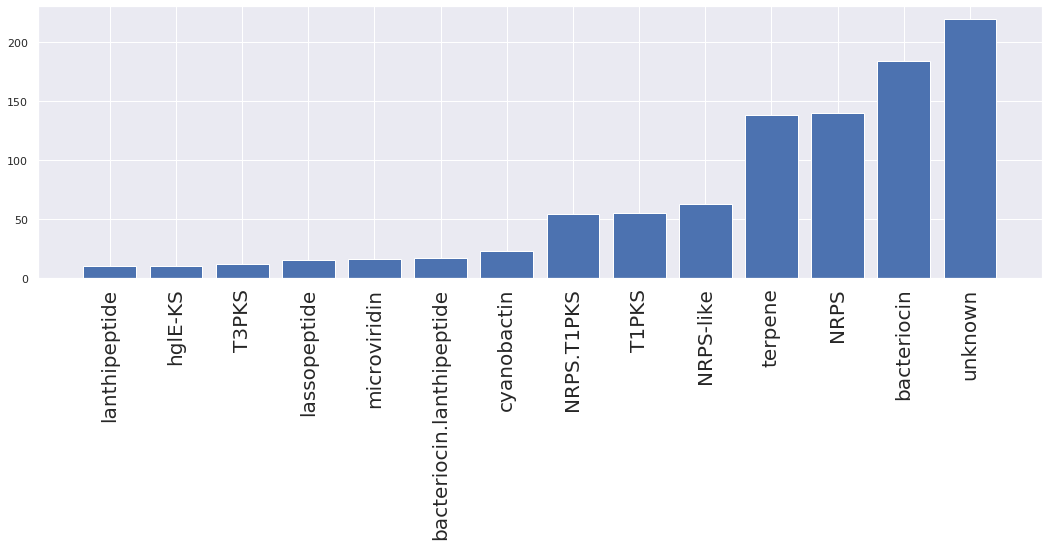

In [121]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,5))

plt.bar(metadata_sum['Type'],metadata_sum['Count'])
plt.xticks(rotation=90,fontsize=20)
# metadata_sum.plot.bar(x='Type')

In [122]:
cyanobiome_list = ['JAAHII01','JAAHIH01','JAAHGF01','JAAHHC01','JAAHHD01','JAAHFN01','JAAHGM01','JAAHGB01','JAAHFW01','JAAHFZ01','JAAHFP01','JAAHGH01','JAAHGC01','JAAHGA01','JAAHHJ01','JAAHGO01','JAAHGU01','JAAHGW01','JAAHGS01','JAAHHM01','JAAHHP01','JAAHHN01','JAAHGL01','JAAHFU01']

In [123]:
col1,col2,col3 = [],[],[]

type_dict = dict(zip(nodes_df['BGC'],nodes_df['Product Prediction']))

def most_frequent(List): 
    return max(set(List), key = List.count) 

for gcf in gcf_dict:
    temp_type_list = []
    for item in gcf_dict[gcf]:
        if item in type_dict:
            if str(item.split('.')[0]) in cyanobiome_list:
                temp_type_list.append(type_dict[item])
    if len(temp_type_list) > 0:
        col1.append(gcf)
        consensus_taxa = most_frequent(temp_type_list)
        col2.append(consensus_taxa)
        col3.append(len(temp_type_list))
    
frames = {'GCF':col1,'Type':col2,'BGC_count':col3}

gcf_metadata = pd.DataFrame(frames)

gcf_metadata

,GCF,Type,BGC_count
0,GCF24,terpene,19
1,GCF26,lassopeptide,14
2,GCF53,bacteriocin.lanthipeptide,3
3,GCF54,bacteriocin,6
4,GCF55,NRPS-like,4
...,...,...,...
114,GCF838,terpene,1
115,GCF845,lanthipeptide,1
116,GCF856,NRPS,1
117,GCF857,terpene,1


In [124]:
sum_col1,sum_col2 = [],[]

for item in np.unique(gcf_metadata['Type']):
    temp_df = gcf_metadata[gcf_metadata['Type'] == item]
    sum_col1.append(item)
    sum_col2.append(len(temp_df))

frames = {'Type':sum_col1,'Count':sum_col2}

metadata_sum = pd.DataFrame(frames)

metadata_sum = metadata_sum.sort_index(by='Count')

metadata_sum = metadata_sum[metadata_sum['Count'] > 2]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if sys.path[0] == '':


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

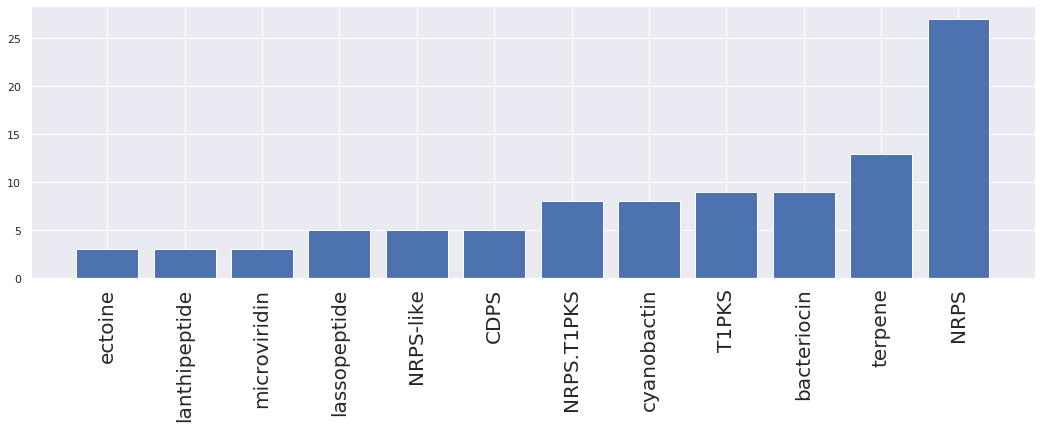

In [125]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,5))

plt.bar(metadata_sum['Type'],metadata_sum['Count'])
plt.xticks(rotation=90,fontsize=20)
# metadata_sum.plot.bar(x='Type')